In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [79]:
data = pd.read_csv('../data/cleaned_movies_no_outliers.csv')
threshold = 2.0
data['is_profitable'] = data['worldwide'] > threshold * data['budget']
data.drop(columns=['worldwide', 'domestic', 'international'], inplace=True)
data = data.select_dtypes(include=[np.number, np.bool_])

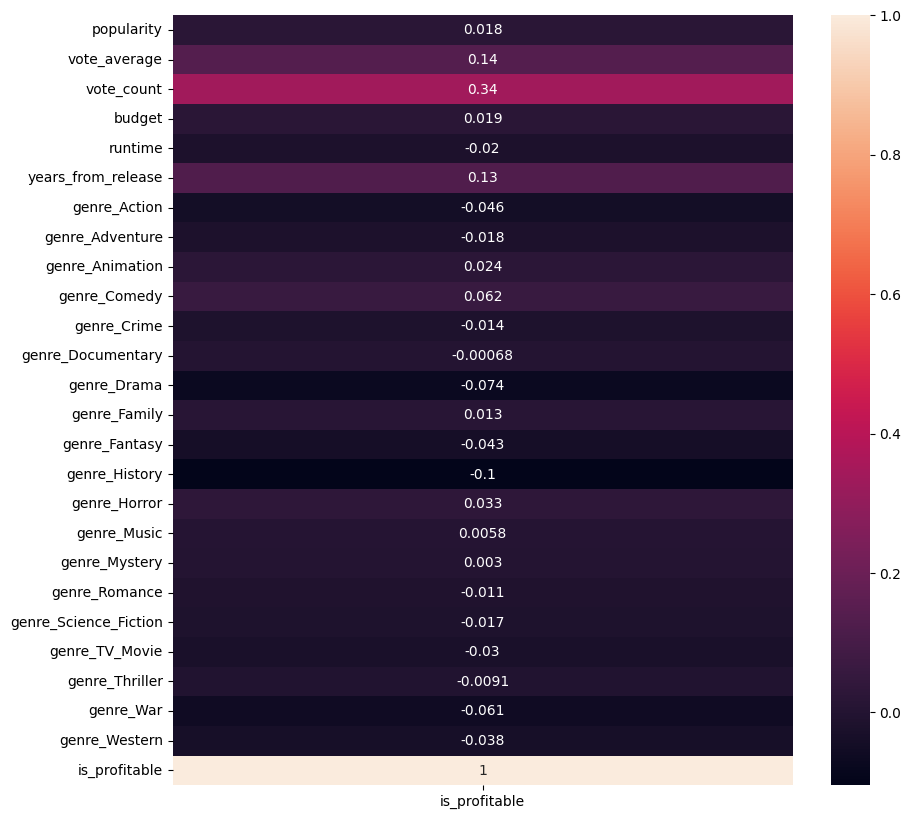

In [80]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr()[['is_profitable']], annot=True)
plt.show()

In [81]:
data = data.sample(frac=1, random_state=0) # shuffle data with random_state=0
data

,popularity,vote_average,vote_count,budget,runtime,years_from_release,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,is_profitable
124,189.475,6.660,3199,17000000,115,2,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2304,25.373,6.500,2346,70000000,112,31,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1428,24.910,6.100,2119,120000000,99,6,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1964,23.534,5.849,2251,18000000,101,29,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1727,31.635,6.187,6885,18000000,97,10,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,44.765,6.900,2289,75000000,121,21,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1731,31.604,7.400,2063,17000000,103,33,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
763,75.839,7.100,9983,183000000,127,5,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
835,69.212,8.100,3789,2800000,131,21,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [82]:
split_points = [0.6, 0.8]
train = data.iloc[:int(split_points[0]*len(data))]
valid = data.iloc[int(split_points[0]*len(data)):int(split_points[1]*len(data))]
test = data.iloc[int(split_points[1]*len(data)):]

In [83]:
train_X = train.drop(columns=['is_profitable'])
train_y = train['is_profitable']
valid_X = valid.drop(columns=['is_profitable'])
valid_y = valid['is_profitable']
test_X = test.drop(columns=['is_profitable'])
test_y = test['is_profitable']

In [84]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=2000, random_state=42)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_
print("Best Parameters:", best_params)
pred_y_valid = best_lr.predict(valid_X)
accuracy = accuracy_score(valid_y, pred_y_valid)
print("Test Accuracy On Validation Dataset:: ", accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy On Validation Dataset::  0.754880694143167


In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print("Best Parameters:", best_params)
pred_y_valid = best_rf.predict(valid_X)
accuracy = accuracy_score(valid_y, pred_y_valid)
print("Test Accuracy On Validation Dataset:", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}
Test Accuracy On Validation Dataset: 0.754880694143167


In [87]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_gb = grid_search.best_estimator_
print("Best Parameters:", best_params)
pred_y_valid = best_gb.predict(valid_X)
accuracy = accuracy_score(valid_y, pred_y_valid)
print("Test Accuracy On Validation Dataset:", accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Test Accuracy On Validation Dataset: 0.7483731019522777


## Comparison 

In [ ]:
models = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb
}

for name, model in models.items():
    model.fit(train_X, train_y)
    pred_y_test = model.predict(test_X)
    accuracy = accuracy_score(test_y, pred_y_test)
    print(f"Test Accuracy On Test Dataset for {name}:", accuracy)